In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df=pd.read_csv(r"C:\Users\TOPE\Desktop\titanic (1).csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###  What was the overall survival rate on the Titanic?

In [4]:
total_passengers = df.shape[0]
survived_passengers = df['Survived'].sum()

survival_rate = (survived_passengers / total_passengers) * 100
survival_rate

38.38383838383838

### Did passengers in certain classes have a higher chance of survival?

In [5]:

# Assuming your dataset is named 'df'
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
class_survival

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

### Did gender play a role in survival rates?

In [6]:
# Assuming your dataset is named 'df'
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
gender_survival

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [7]:
### Were passengers with siblings or spouses more likely to survive?

In [8]:

# Assuming your dataset is named 'df'
sibsp_survival = df.groupby('SibSp')['Survived'].mean() * 100
sibsp_survival

SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64

###  Did having parents or children aboard the Titanic influence survival rates?


In [9]:

# Assuming your dataset is named 'df'
parch_survival = df.groupby('Parch')['Survived'].mean() * 100
parch_survival

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64

### What was the age distribution of passengers on the Titanic?

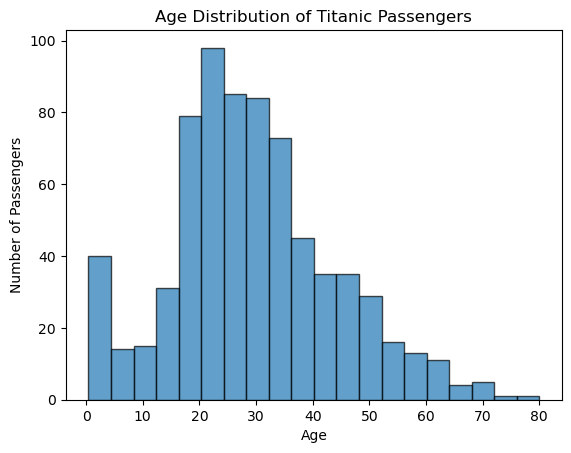

In [10]:
# Assuming your dataset is named 'df' and you have dropped NaN values in the 'Age' column
age_data = df['Age']

# Create a histogram
plt.hist(age_data, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Titanic Passengers')
plt.show()

###  Did age impact a passenger's likelihood of survival?

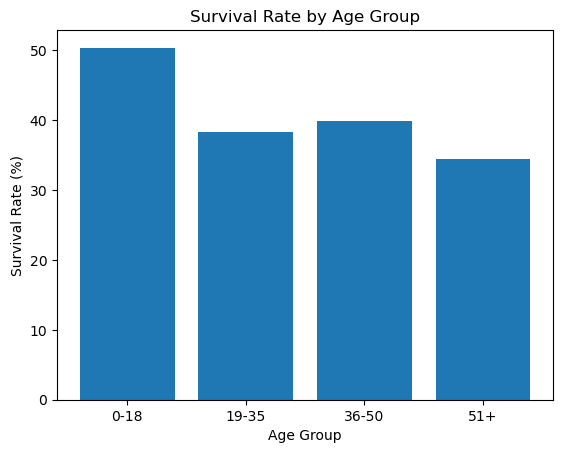

In [11]:
# Assuming your dataset is named 'df' and you have dropped NaN values in the 'Age' column
age_data = df['Age']
df['AgeGroup'] = pd.cut(age_data, bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

# Calculate survival rate for each age group
age_group_survival = df.groupby('AgeGroup')['Survived'].mean()

# Create a bar chart to visualize the survival rates
plt.bar(age_group_survival.index, age_group_survival * 100)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group')
plt.show()

### Were children given priority in the lifeboats?

###  What was the distribution of ticket fares?

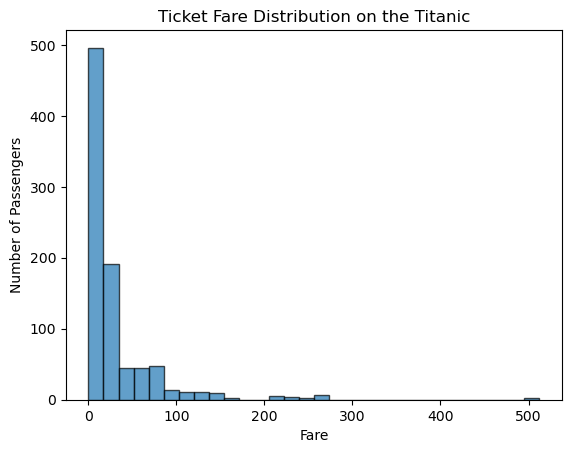

In [12]:
# Assuming your dataset is named 'df'
fare_data = df['Fare']

# Create a histogram
plt.hist(fare_data, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Ticket Fare Distribution on the Titanic')
plt.show()

### . Did passengers who paid more for their tickets have a higher chance of survival?

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


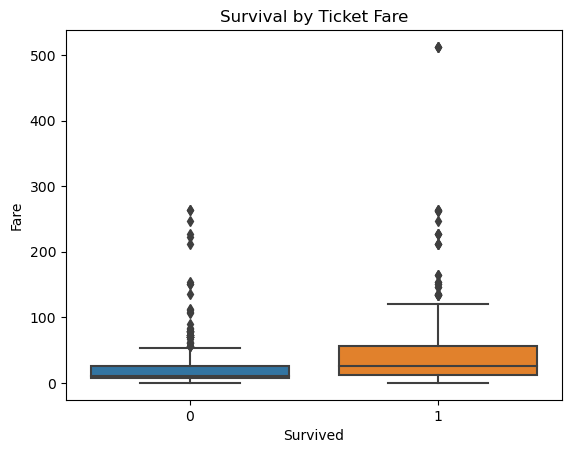

In [13]:

# Assuming your dataset is named 'df'
# Let's first check the summary statistics of ticket fares
print(df['Fare'].describe())

# Create a box plot to visualize the relationship between fare and survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Survival by Ticket Fare')
plt.show()

### Did the ticket fare correlate with the passenger class?


### How many passengers embarked from each of the three ports (Southampton, Cherbourg, and Queenstown)

### Did the port of embarkation influence a passenger's survival chances?

### . What was the average family size on the Titanic?

### What was the average family size on the Titanic?

### How many passengers had cabin information available in the dataset?

###  What are the most common titles (e.g., Mr., Mrs., Miss) among passengers, and did they impact survival?

### Can we identify any interactions between different features that had a significant impact on survival?

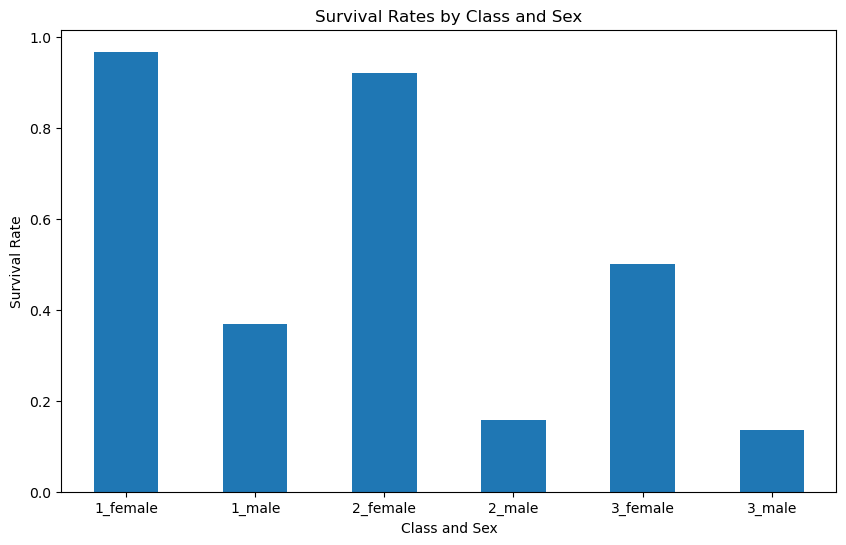

In [19]:
# Assuming your dataset is named 'titanic_data'
df['Class_Sex'] = df['Pclass'].astype(str) + '_' + df['Sex']

# Calculate survival rates by "Class_Sex"
survival_rates = df.groupby('Class_Sex')['Survived'].mean()
# Assuming your dataset is named 'titanic_data'
df['Class_Sex'] = df['Pclass'].astype(str) + '_' + df['Sex']

# Calculate survival rates by "Class_Sex"
survival_rates = df.groupby('Class_Sex')['Survived'].mean()
# Create a bar chart
plt.figure(figsize=(10, 6))
survival_rates.plot(kind='bar')
plt.xlabel('Class and Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Class and Sex')
plt.xticks(rotation=0)

# Display the plot
plt.show()